In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import weibull_min
import statistics




https://data.gov.ie/dataset/smartbay-ireland-galway-bay-buoy-weather
#https://www.digitalocean.com/community/tutorials/markdown-markdown-images

[![]("https://www.smartbay.ie/sites/default/files/front/research_new_2_0.jpg")]
<img src="https://www.smartbay.ie/sites/default/files/front/research_new_2_0.jpg" alt="Image description" width="700" height="300">

### Introduction
My dataset is from Smartbay https://www.smartbay.ie/about which is "Irelands key national facility for advanced marine research and the development of marine technologies, sensors and equipment expanding the Blue Economy and improving our ocean knowledge. It was set up in 1991. I have synthesised a dataset simulating 4 variables. 
1. Air Temperature (Degrees C)
2. Barometric Pressure (inches)
3. Wind Direction (Degrees Magnetic)
4. Wind Speed (Knot)

I will go through the distribuitpn i have used to synthesise each variable below.

After reading .csv file, I can see the original dataset contains 8 variables. I decided to drop 4 variables using .drop() to have a more concise dataset.

In [2]:

df1=pd.read_csv('http://data.marine.ie/downloads/SmartBayIreland/GalwaySampleWeatherData.csv',nrows = 267)
#https://stackoverflow.com/questions/48899051/how-to-drop-a-specific-column-of-csv-file-while-reading-it-using-pandas
df1 = df1.drop(['Longitude','Latitude','Wind Direction (Degrees True)','Barometric Pressure (Millibars)',"Wind Speed (Meters/Sec)"],axis =1)
df1
#df1.loc[df1.loc[:,'SensorTimestamp'] >= '14/08/2015']



,SensorTimestamp,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot)
0,11/08/2015 14:54:33,11.7,30.1974,247.8,9.9
1,11/08/2015 14:54:42,11.9,30.2003,247.8,11.1
2,11/08/2015 14:56:59,11.9,30.2003,257.1,11.7
3,13/08/2015 10:50:11,15.1,30.0911,173.7,6.5
4,13/08/2015 12:02:42,11.4,30.0645,258.1,10.1
...,...,...,...,...,...
262,14/08/2015 23:36:17,9.0,29.8725,250.9,5.4
263,14/08/2015 23:41:17,9.1,29.8784,195.6,3.9
264,14/08/2015 23:46:17,9.2,29.8725,242.8,3.8
265,14/08/2015 23:51:17,9.0,29.8755,235.9,2.5


Below is plot of all variables

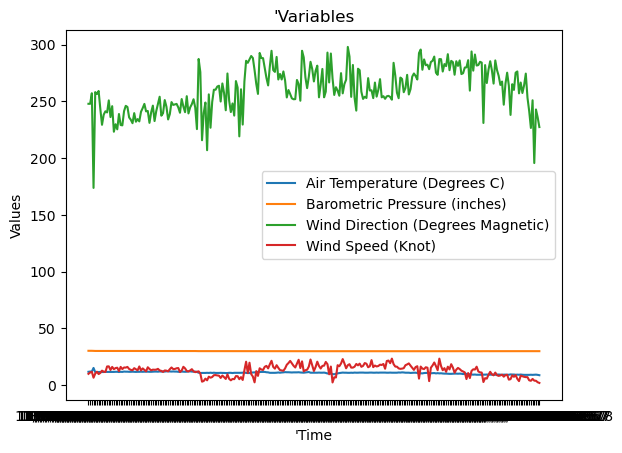

In [3]:
sns.lineplot(data=df1, x = "SensorTimestamp", y = "Air Temperature (Degrees C)")
sns.lineplot(data=df1, x = "SensorTimestamp", y = "Barometric Pressure (inches)")
sns.lineplot(data=df1, x = "SensorTimestamp", y = "Wind Direction (Degrees Magnetic)")
sns.lineplot(data=df1, x = "SensorTimestamp", y = "Wind Speed (Knot)")
plt.title("'Variables")
plt.xlabel("'Time")
plt.ylabel("Values")
plt.legend(["Air Temperature (Degrees C)","Barometric Pressure (inches)","Wind Direction (Degrees Magnetic)","Wind Speed (Knot)"])
plt.show()
plt.show()

as shown above , data is sporadic so removing dates from start. need to figure out how to do date range 

creating new data frame to convert variable SensorTimestamp to dtype: datetime64

SensorTimestamp column is int 64 bit, the following steps to create new column called datetime with type asa datetime

In [4]:
df1['SensorTimestamp']


0      11/08/2015 14:54:33
1      11/08/2015 14:54:42
2      11/08/2015 14:56:59
3      13/08/2015 10:50:11
4      13/08/2015 12:02:42
              ...         
262    14/08/2015 23:36:17
263    14/08/2015 23:41:17
264    14/08/2015 23:46:17
265    14/08/2015 23:51:17
266    14/08/2015 23:56:18
Name: SensorTimestamp, Length: 267, dtype: object

In [5]:
pd.to_datetime(df1['SensorTimestamp'])

0     2015-11-08 14:54:33
1     2015-11-08 14:54:42
2     2015-11-08 14:56:59
3     2015-08-13 10:50:11
4     2015-08-13 12:02:42
              ...        
262   2015-08-14 23:36:17
263   2015-08-14 23:41:17
264   2015-08-14 23:46:17
265   2015-08-14 23:51:17
266   2015-08-14 23:56:18
Name: SensorTimestamp, Length: 267, dtype: datetime64[ns]

new variable datetime added

In [6]:
df1['datetime'] = pd.to_datetime(df1['SensorTimestamp'])


In [7]:
df1['datetime']


0     2015-11-08 14:54:33
1     2015-11-08 14:54:42
2     2015-11-08 14:56:59
3     2015-08-13 10:50:11
4     2015-08-13 12:02:42
              ...        
262   2015-08-14 23:36:17
263   2015-08-14 23:41:17
264   2015-08-14 23:46:17
265   2015-08-14 23:51:17
266   2015-08-14 23:56:18
Name: datetime, Length: 267, dtype: datetime64[ns]

In [8]:
df2=df1.loc[df1.loc[:,'SensorTimestamp'] >= '14/08/2015 ']
df2

,SensorTimestamp,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot),datetime
72,14/08/2015 00:02:20,10.9,29.9198,226.7,6.5,2015-08-14 00:02:20
73,14/08/2015 00:07:21,10.7,29.9139,249.4,7.1,2015-08-14 00:07:21
74,14/08/2015 00:12:22,10.9,29.9139,260.2,8.7,2015-08-14 00:12:22
75,14/08/2015 00:17:22,10.7,29.9109,260.2,8.8,2015-08-14 00:17:22
76,14/08/2015 00:22:22,10.7,29.9080,263.0,8.5,2015-08-14 00:22:22
...,...,...,...,...,...,...
262,14/08/2015 23:36:17,9.0,29.8725,250.9,5.4,2015-08-14 23:36:17
263,14/08/2015 23:41:17,9.1,29.8784,195.6,3.9,2015-08-14 23:41:17
264,14/08/2015 23:46:17,9.2,29.8725,242.8,3.8,2015-08-14 23:46:17
265,14/08/2015 23:51:17,9.0,29.8755,235.9,2.5,2015-08-14 23:51:17


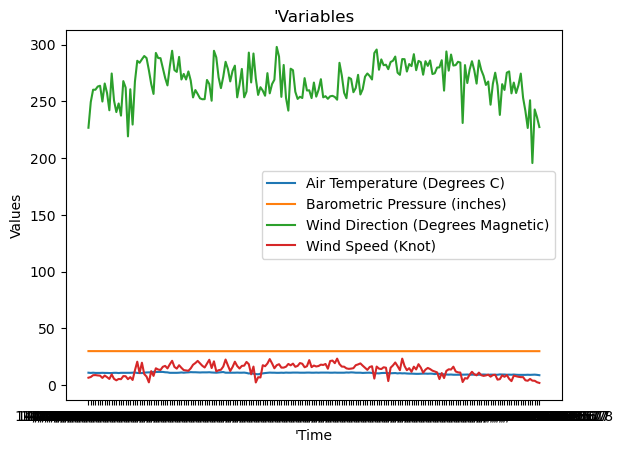

In [9]:
sns.lineplot(data=df2, x = "SensorTimestamp", y = "Air Temperature (Degrees C)")
sns.lineplot(data=df2, x = "SensorTimestamp", y = "Barometric Pressure (inches)")
sns.lineplot(data=df2, x = "SensorTimestamp", y = "Wind Direction (Degrees Magnetic)")
sns.lineplot(data=df2, x = "SensorTimestamp", y = "Wind Speed (Knot)")
plt.title("'Variables")
plt.xlabel("'Time")
plt.ylabel("Values")
plt.legend(["Air Temperature (Degrees C)","Barometric Pressure (inches)","Wind Direction (Degrees Magnetic)","Wind Speed (Knot)"])
plt.show()
plt.show()

In [10]:
df3=df2.loc[df2.loc[:,'datetime'] <='2015/08/25']
df3

,SensorTimestamp,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot),datetime
72,14/08/2015 00:02:20,10.9,29.9198,226.7,6.5,2015-08-14 00:02:20
73,14/08/2015 00:07:21,10.7,29.9139,249.4,7.1,2015-08-14 00:07:21
74,14/08/2015 00:12:22,10.9,29.9139,260.2,8.7,2015-08-14 00:12:22
75,14/08/2015 00:17:22,10.7,29.9109,260.2,8.8,2015-08-14 00:17:22
76,14/08/2015 00:22:22,10.7,29.9080,263.0,8.5,2015-08-14 00:22:22
...,...,...,...,...,...,...
262,14/08/2015 23:36:17,9.0,29.8725,250.9,5.4,2015-08-14 23:36:17
263,14/08/2015 23:41:17,9.1,29.8784,195.6,3.9,2015-08-14 23:41:17
264,14/08/2015 23:46:17,9.2,29.8725,242.8,3.8,2015-08-14 23:46:17
265,14/08/2015 23:51:17,9.0,29.8755,235.9,2.5,2015-08-14 23:51:17


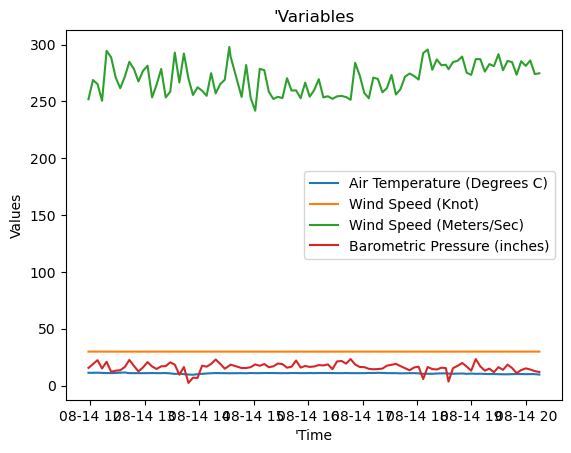

In [11]:
sns.lineplot(data=df3[50:150], x = "datetime", y = "Air Temperature (Degrees C)")
sns.lineplot(data=df3[50:150], x = "datetime", y = "Barometric Pressure (inches)")
sns.lineplot(data=df3[50:150], x = "datetime", y = "Wind Direction (Degrees Magnetic)")
sns.lineplot(data=df3[50:150], x = "datetime", y = "Wind Speed (Knot)")
#axis('equal')
plt.title("'Variables")
plt.xlabel("'Time")
plt.ylabel("Values")
plt.legend(["Air Temperature (Degrees C)","Wind Speed (Knot)","Wind Speed (Meters/Sec)","Barometric Pressure (inches)"])
plt.show()

I used .describe() to display count, mean, standard deviation, min, 25%, 50%, 75% and max values. These values especially the mean and standard deviation will be used as inputs into distribution model.

In [12]:
df3.describe()

,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot)
count,195.000000,195.000000,195.000000,195.000000
mean,10.422564,29.856636,267.735385,13.044615
std,0.766908,0.020849,16.536686,5.296362
min,8.700000,29.828200,195.600000,1.900000
25%,9.950000,29.843000,256.750000,8.500000
50%,10.800000,29.848900,269.200000,14.300000
75%,10.900000,29.872500,280.300000,16.900000
max,11.700000,29.919800,297.900000,23.300000


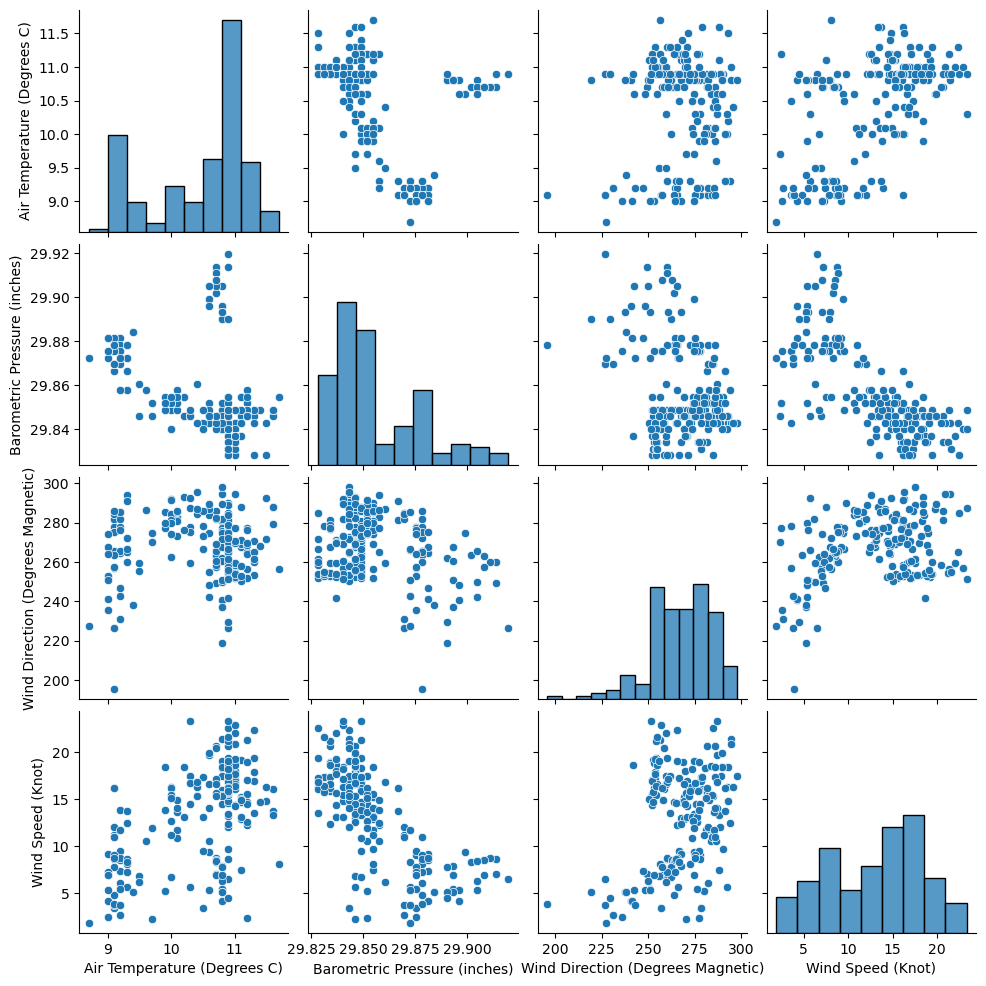

In [13]:
sns.pairplot(df3)
plt.show()

In [14]:
#df3.mode('Air Temperature (Degrees C)')

Air Temperature (Degrees C)                 float64
Barometric Pressure (inches)                float64
Wind Direction (Degrees Magnetic)           float64
Wind Speed (Knot)                           float64
datetime                             datetime64[ns]

In [15]:
#df3

<AxesSubplot:title={'center':'Air Temp vs Barometric Pressure (inches)'}, xlabel='Air Temperature (Degrees C)'>

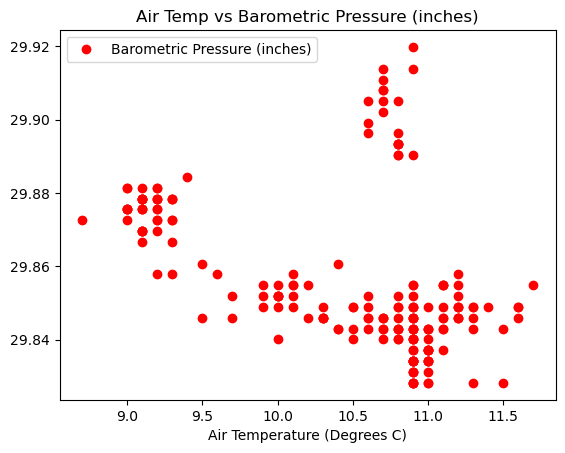

In [16]:
df3.plot(x='Air Temperature (Degrees C)', y='Barometric Pressure (inches)', style='ro', title="Air Temp vs Barometric Pressure (inches)")

<AxesSubplot:title={'center':'Air Temp and Wind Speed'}, xlabel='Air Temperature (Degrees C)'>

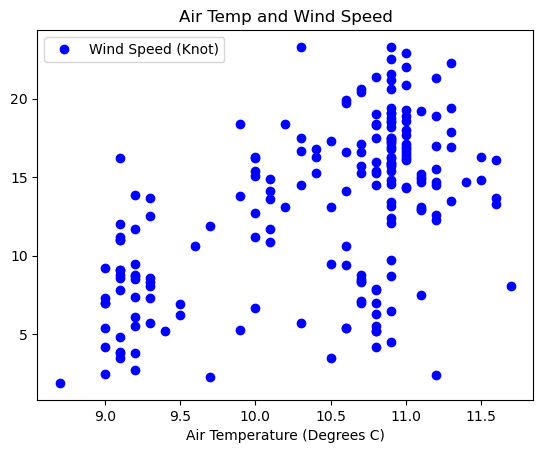

In [17]:
df3.plot(x='Air Temperature (Degrees C)', y='Wind Speed (Knot)', style='bo', title="Air Temp and Wind Speed")

Displaying data types of each variable using .dtypes command

In [18]:
df3.dtypes

SensorTimestamp                              object
Air Temperature (Degrees C)                 float64
Barometric Pressure (inches)                float64
Wind Direction (Degrees Magnetic)           float64
Wind Speed (Knot)                           float64
datetime                             datetime64[ns]
dtype: object

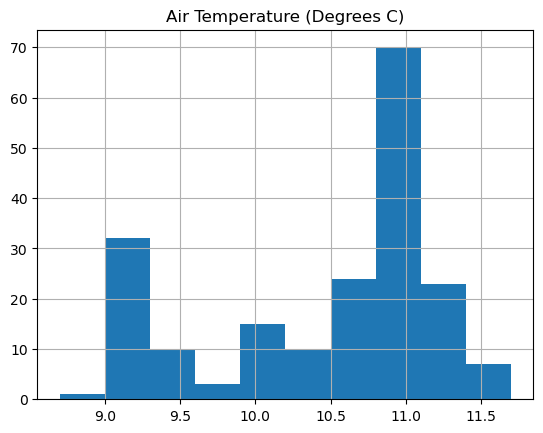

In [19]:

df3.hist('Air Temperature (Degrees C)')
plt.show()

In [20]:
idx1 = pd.date_range(start = "2023-11-08 00:00:33", periods=100, freq="MIN")
idx1

DatetimeIndex(['2023-11-08 00:00:33', '2023-11-08 00:01:33',
               '2023-11-08 00:02:33', '2023-11-08 00:03:33',
               '2023-11-08 00:04:33', '2023-11-08 00:05:33',
               '2023-11-08 00:06:33', '2023-11-08 00:07:33',
               '2023-11-08 00:08:33', '2023-11-08 00:09:33',
               '2023-11-08 00:10:33', '2023-11-08 00:11:33',
               '2023-11-08 00:12:33', '2023-11-08 00:13:33',
               '2023-11-08 00:14:33', '2023-11-08 00:15:33',
               '2023-11-08 00:16:33', '2023-11-08 00:17:33',
               '2023-11-08 00:18:33', '2023-11-08 00:19:33',
               '2023-11-08 00:20:33', '2023-11-08 00:21:33',
               '2023-11-08 00:22:33', '2023-11-08 00:23:33',
               '2023-11-08 00:24:33', '2023-11-08 00:25:33',
               '2023-11-08 00:26:33', '2023-11-08 00:27:33',
               '2023-11-08 00:28:33', '2023-11-08 00:29:33',
               '2023-11-08 00:30:33', '2023-11-08 00:31:33',
               '2023-11-

#random triangular https://numpy.org/doc/stable/reference/random/generated/numpy.random.triangular.html

In [21]:
# Define the dataset

data = np.loadtxt('data.csv')

# Calculate the mode
mode = statistics.mode(data)

# Print the mode
print("The mode of the dataset is:", mode)

The mode of the dataset is: 10.9


In [22]:
# Define the left, mode, and right parameters
left = 8.7
mode = 10.9
right = 11.7
np.random.seed(4)

# Generate a random sample of size 1000 from the triangular distribution
d3 = np.random.triangular(left, mode, right, size=100)

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

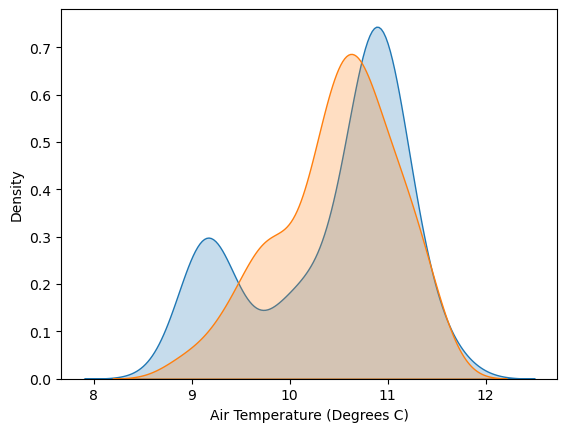

In [23]:
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)
sns.kdeplot((d3),shade=True)

###Wind Direction (Degrees Magnetic)

In [24]:
rng4 = np.random.default_rng()
mu1, sigma1 = 267.73, 16.53
ts4 = pd.DataFrame(data=rng4.normal(mu1, sigma1,len(idx1)),index =idx1, columns=['Synthesised Wind Direction (Degrees Magnetic)'])
ts4

,Synthesised Wind Direction (Degrees Magnetic)
2023-11-08 00:00:33,272.689468
2023-11-08 00:01:33,279.312064
2023-11-08 00:02:33,261.977504
2023-11-08 00:03:33,235.850356
2023-11-08 00:04:33,264.015832
...,...
2023-11-08 01:35:33,249.562646
2023-11-08 01:36:33,265.885605
2023-11-08 01:37:33,263.725631
2023-11-08 01:38:33,267.906147


<AxesSubplot:xlabel='Wind Direction (Degrees Magnetic)', ylabel='Density'>

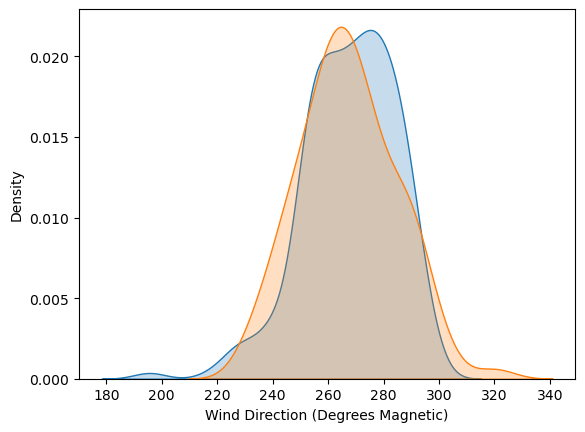

In [25]:
sns.kdeplot(df3['Wind Direction (Degrees Magnetic)'],shade=True, label="actual")
sns.kdeplot(ts4['Synthesised Wind Direction (Degrees Magnetic)'],shade=True, label="simulated")

###Barometric

In [26]:
np.random.seed(100)
rng3 = np.random.default_rng()
mu1, sigma1 = 29.8566, 0.0208
ts3 = pd.DataFrame(data=rng3.normal(mu1, sigma1,len(idx1)),index =idx1, columns=['Synthesised Barometric'])
ts3

,Synthesised Barometric
2023-11-08 00:00:33,29.836279
2023-11-08 00:01:33,29.851273
2023-11-08 00:02:33,29.829247
2023-11-08 00:03:33,29.820153
2023-11-08 00:04:33,29.868279
...,...
2023-11-08 01:35:33,29.866134
2023-11-08 01:36:33,29.871021
2023-11-08 01:37:33,29.873884
2023-11-08 01:38:33,29.858297


<AxesSubplot:xlabel='Barometric Pressure (inches)', ylabel='Density'>

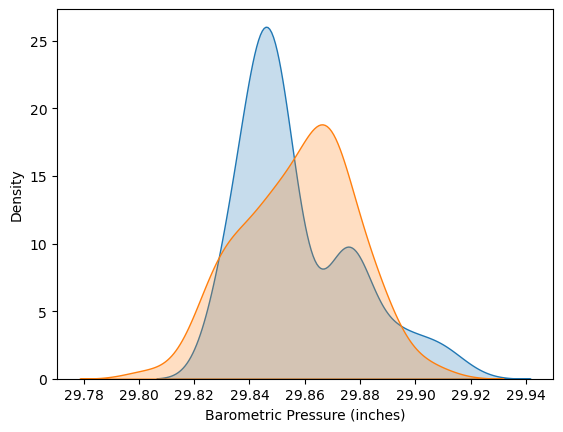

In [27]:
sns.kdeplot(df3['Barometric Pressure (inches)'],shade=True)
sns.kdeplot(ts3['Synthesised Barometric'],shade=True)

In [28]:
rng1 = np.random.default_rng()
mu1, sigma1 = 10.4225, .7669
ts1 = pd.DataFrame(data=rng1.normal(mu1, sigma1,len(idx1)),index =idx1, columns=['Synthesised Air Temperature (Degrees C)'])
ts1

,Synthesised Air Temperature (Degrees C)
2023-11-08 00:00:33,10.737014
2023-11-08 00:01:33,10.346921
2023-11-08 00:02:33,11.143902
2023-11-08 00:03:33,9.201553
2023-11-08 00:04:33,10.245831
...,...
2023-11-08 01:35:33,10.854789
2023-11-08 01:36:33,10.576373
2023-11-08 01:37:33,9.934320
2023-11-08 01:38:33,11.482969


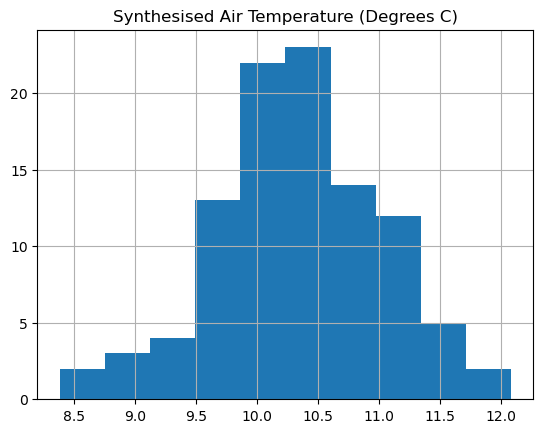

In [29]:
ts1.hist('Synthesised Air Temperature (Degrees C)')
plt.show()

In [30]:
#sns.lineplot(data=df3, x="datetime", y = "Air Temperature (Degrees C)")

#code to check distributions
from scipy import stats
from fitter import Fitter
data = pd.read_csv('data.csv')
f = Fitter(data)
f.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions
f.summary()

In [31]:
x1 = np.random.normal(10.76,.76,100)

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

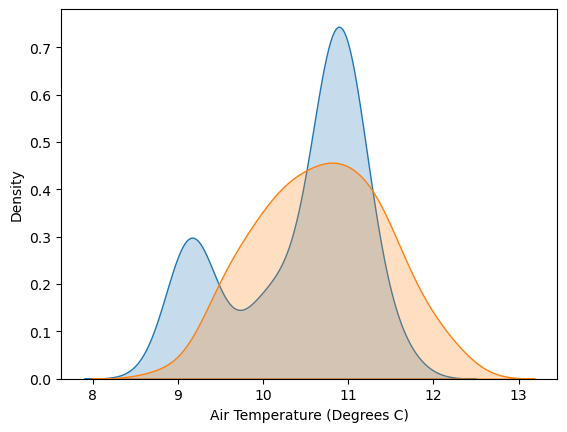

In [32]:
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)
sns.kdeplot((x1),shade=True)


some ditsributions i tried to to get a better distribution match.
1. standard cauchy
2. standard gamma
3. standard triangle
4. uniform
5. johnsonsu

###standard cauch code below taken from https://numpy.org/doc/stable/reference/random/generated/numpy.random.standard_cauchy.html. The min and max values were calculated in .describe() output.

In [33]:
import matplotlib.pyplot as plt
t1 = np.random.standard_cauchy(100)
t1 = t1[(t1>8.7) & (t1<11.7)]  # truncate distribution so it plots well


<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

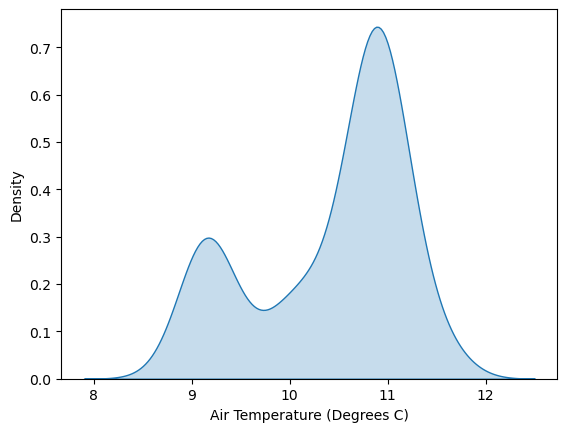

In [34]:
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)
sns.kdeplot((t1),shade=True)


#standard gamma

for Air temp , Shape parameter (k) = 317.2792120103159
Scale parameter (theta) = 0.05614087677067406

In [35]:
# Define the shape and scale parameters
k = 317.27
theta = 0.056
# Draw 10 samples from a standard Gamma distribution with shape 2
sample = np.random.standard_gamma(k, size=100) * theta
sample

array([17.20722936, 17.69603049, 21.10387559, 21.28432839, 19.39540685,
       18.7775346 , 18.25034148, 16.69545178, 18.13382848, 19.1126477 ,
       17.87191455, 19.33661233, 18.64820963, 17.8369797 , 18.96839771,
       17.28904935, 18.10037801, 17.61710454, 17.22955101, 17.17170919,
       16.43070621, 16.09618725, 20.60207929, 15.85336214, 18.72670237,
       19.02792857, 17.75846176, 18.2315967 , 16.61383782, 17.72735047,
       18.62020141, 17.50374103, 18.07464659, 17.10412496, 17.61956504,
       17.57868778, 18.54819227, 18.85934489, 15.70730027, 18.01202221,
       15.89172125, 17.77260581, 17.1840249 , 20.62828022, 18.35648308,
       16.71111365, 15.84341776, 17.91560268, 17.31005674, 18.49539494,
       17.4158198 , 17.61258856, 15.78336898, 18.54137388, 17.55198833,
       16.90994817, 16.70326291, 17.97455713, 15.54799294, 17.91060602,
       19.27352131, 17.3941117 , 19.31003888, 16.75423508, 16.58567689,
       19.15470947, 17.05655075, 17.993031  , 17.69384632, 17.50

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

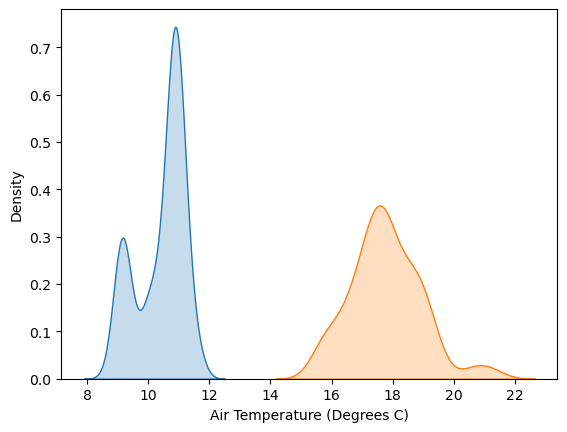

In [36]:
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)
sns.kdeplot((sample),shade=True)
#sns.kdeplot((x2),shade=True)

##Uniform Dsitribution

In [37]:
s4 = np.random.uniform(8.7,11.3,100)



<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

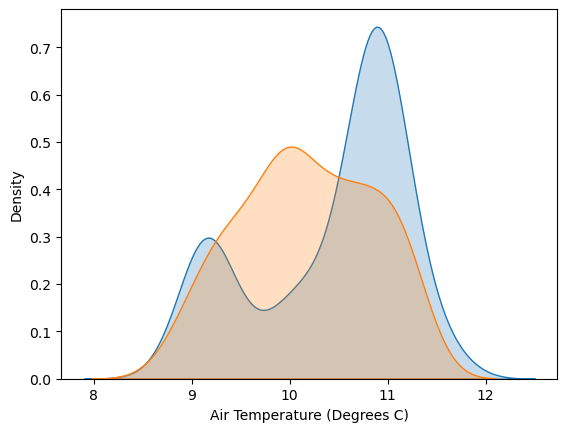

In [38]:

sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)
sns.kdeplot((s4),shade=True)

In [39]:
rng55 = np.random.default_rng()
mu1, sigma1 = 10.76, .76
ts55 = pd.DataFrame(data=rng55.normal(mu1, sigma1,len(idx1)),index =idx1, columns=['Synthesised Air'])
ts55

,Synthesised Air
2023-11-08 00:00:33,9.427074
2023-11-08 00:01:33,10.060390
2023-11-08 00:02:33,12.271340
2023-11-08 00:03:33,10.354018
2023-11-08 00:04:33,11.741361
...,...
2023-11-08 01:35:33,11.775741
2023-11-08 01:36:33,11.119492
2023-11-08 01:37:33,9.960233
2023-11-08 01:38:33,10.810602


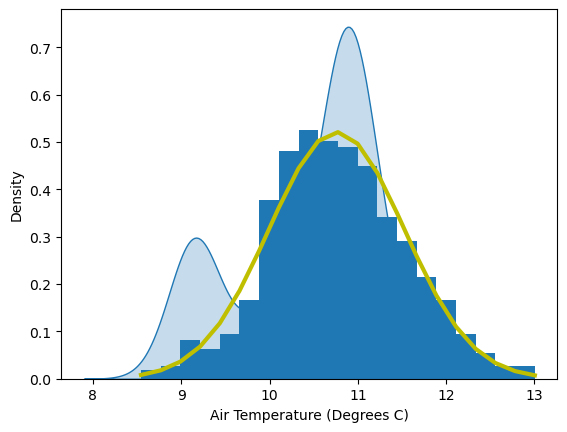

In [40]:
mu, sigma = 10.76, .766
s = np.random.normal(mu, sigma, 1000) # Mean is 40 and std is 1.

# Create the bins and histogram
count, bins, ignored = plt.hist(s, 20, density=True)

# Plot the distribution curve
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=3, color='y')
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)
plt.show()

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

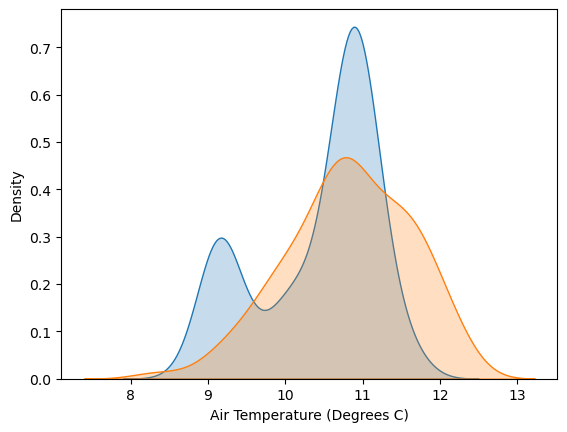

In [41]:
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)
sns.kdeplot(ts55['Synthesised Air'],shade=True)

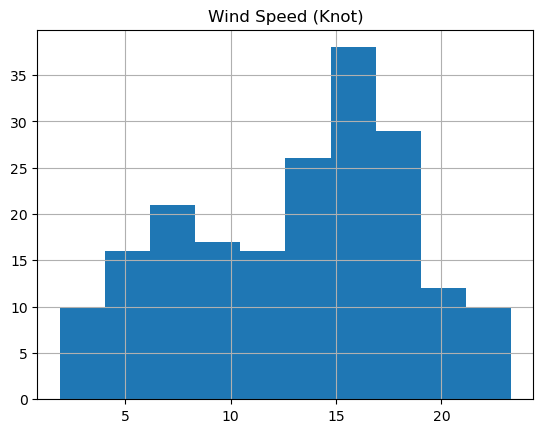

In [42]:
df3.hist('Wind Speed (Knot)')
plt.show()

In [43]:
#idx2 = pd.date_range(start = "2015-11-08 14:54:33", periods=100, freq="MIN")
#idx2

In [44]:
a = 5

# Generate 1000 samples from the Weibull distribution
s9 = np.random.normal(10.4225,.7669, 200)
#s9

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

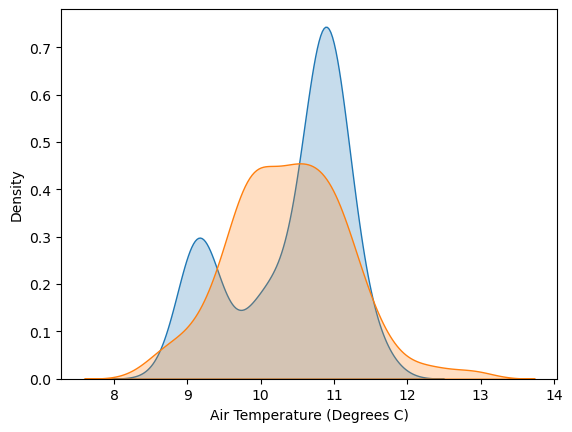

In [45]:
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)
sns.kdeplot((s9),shade=True)

<AxesSubplot:xlabel='Wind Speed (Knot)', ylabel='Density'>

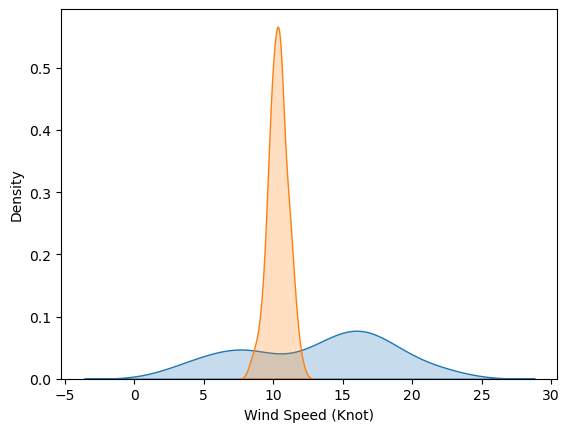

In [46]:
sns.kdeplot(df3['Wind Speed (Knot)'],shade=True)
sns.kdeplot(ts1['Synthesised Air Temperature (Degrees C)'],shade=True)

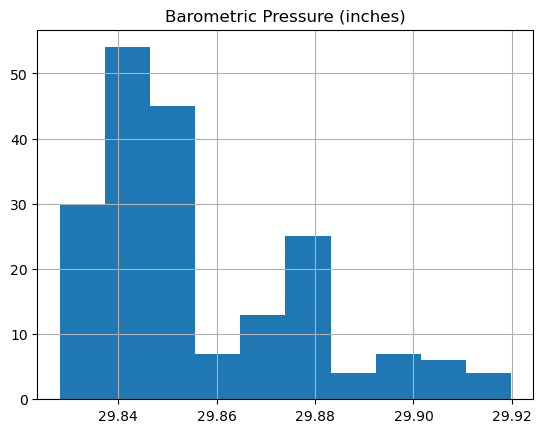

In [47]:
df3.hist('Barometric Pressure (inches)')
plt.show()

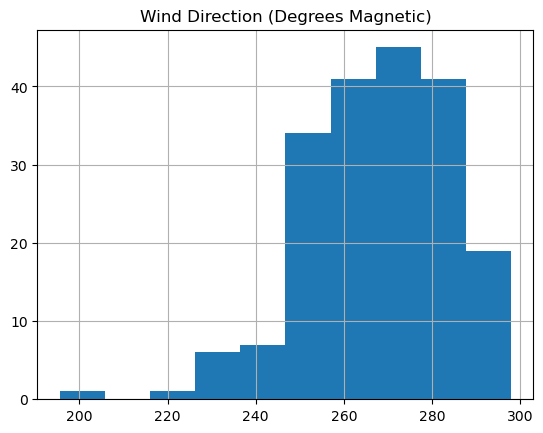

In [48]:
df3.hist('Wind Direction (Degrees Magnetic)')
plt.show()

<AxesSubplot:xlabel='Wind Direction (Degrees Magnetic)', ylabel='Density'>

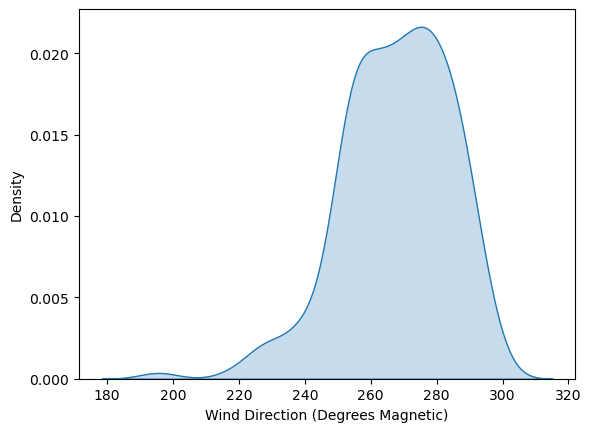

In [49]:
sns.kdeplot(df3['Wind Direction (Degrees Magnetic)'],shade=True)

In [50]:
#sns.kdeplot(ts2['Synthesised Wind Speed (Knot)'],shade=True, label="simulated")

In [51]:
#sns.set(style="ticks", palette="colorblind")
#axes=plt.subplots(2,2, figsize=(9,9))
#sns.kdeplot(df3['Air Temperature (Degrees C)'], shade=True, label="simulated")
#sns.kdeplot(ts1['Synthesisd Air Temperature (Degrees C)'],shade=True, label="simulated")
#Air Temperature (Degrees C)

In [52]:
#sns.set(style="ticks", palette="colorblind")
#axes=plt.subplots(2,2, figsize=(9,9))
#sns.kdeplot(df3['Air Temperature (Degrees C)'], shade=True, label="simulated")
#sns.kdeplot(ts1['Synthesisd Air Temperature (Degrees C)'],shade=True, label="simulated")
#Air Temperature (Degrees C)

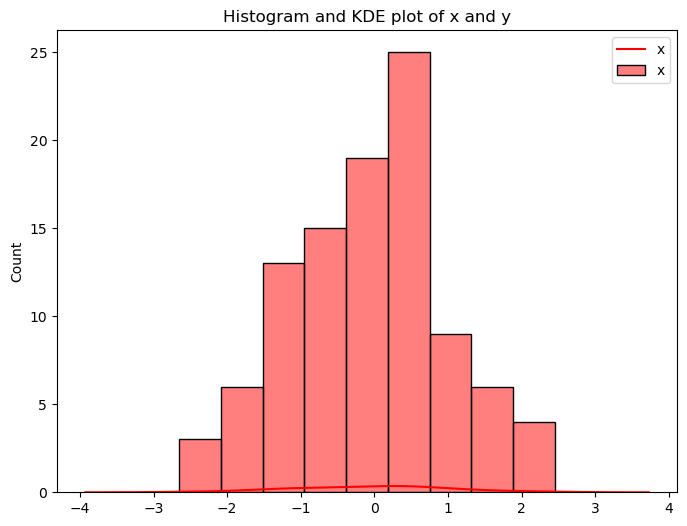

In [53]:
x = np.random.normal(size=100)
#y = np.random.normal(size=100)
fig, ax = plt.subplots(figsize=(8, 6))

# Plot a histogram of x and y
sns.histplot(x=x, ax=ax, color='red', alpha=0.5, label='x')
#sns.histplot(x=y, ax=ax, color='green', alpha=0.5, label='y')

# Plot a KDE plot of x and y
sns.kdeplot(x=x, ax=ax, color='red', label='x')
#sns.kdeplot(x=y, ax=ax, color='green', label='y')

# Add legends and titles to the subplot
ax.legend()
ax.set_title('Histogram and KDE plot of x and y')

# Show the plot
plt.show()

In [54]:
rng3 = np.random.default_rng()
shape = 5.0
scale = 2.0
values = weibull_min.rvs(shape, scale=scale, size=100)
#ts1 = pd.DataFrame(data=rng1.weibull(200,len(idx1)),index =idx1, columns=['Synthesises Weibull'])
#ts1

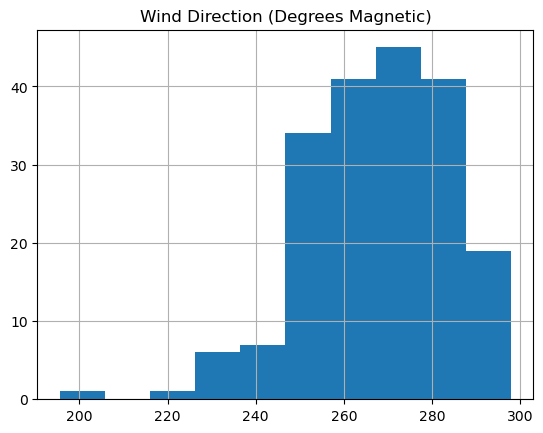

In [55]:
df3.hist('Wind Direction (Degrees Magnetic)')
plt.show()

In [56]:
rng1 = np.random.default_rng()
mu1, sigma1 = 267, 16.53
ts4 = pd.DataFrame(data=rng1.normal(mu1, sigma1,len(idx1)),index =idx1, columns=['Synthesised Wind direction'])
ts4

,Synthesised Wind direction
2023-11-08 00:00:33,293.226743
2023-11-08 00:01:33,276.518538
2023-11-08 00:02:33,254.542498
2023-11-08 00:03:33,244.393366
2023-11-08 00:04:33,300.082656
...,...
2023-11-08 01:35:33,285.837917
2023-11-08 01:36:33,274.626535
2023-11-08 01:37:33,262.835278
2023-11-08 01:38:33,291.809050


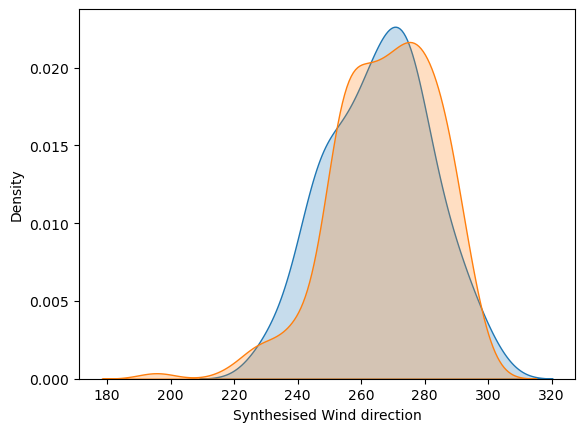

In [57]:
sns.kdeplot(ts4['Synthesised Wind direction'],shade=True, label="simulated")
sns.kdeplot(df3['Wind Direction (Degrees Magnetic)'],shade=True)
plt.show()
#sns.histplot('Wind Direction (Degrees Magnetic)',kde = True)

In [58]:
import numpy as np
dt = np.random.poisson(10.76, 100)
#dt

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

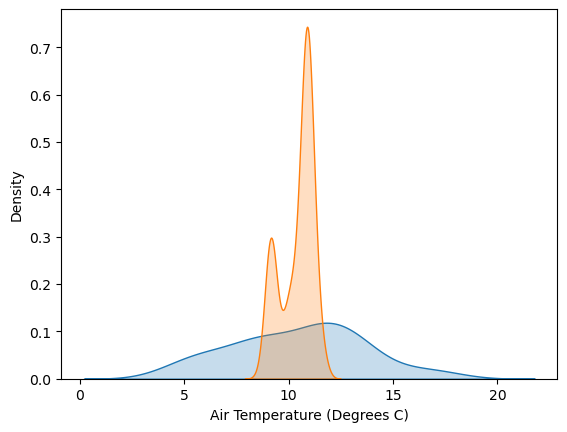

In [59]:
sns.kdeplot((dt),shade=True, label="simulated")
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)

In [60]:

values = np.random.rayleigh(10.76, 200)
#values

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

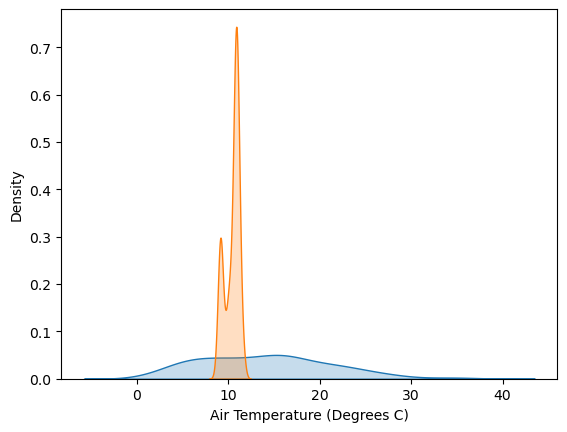

In [61]:
sns.kdeplot((values),shade=True, label="simulated")
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)

In [62]:
loc, scale = 11.7, .76
s5 = np.random.laplace(loc, scale, 200)


<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

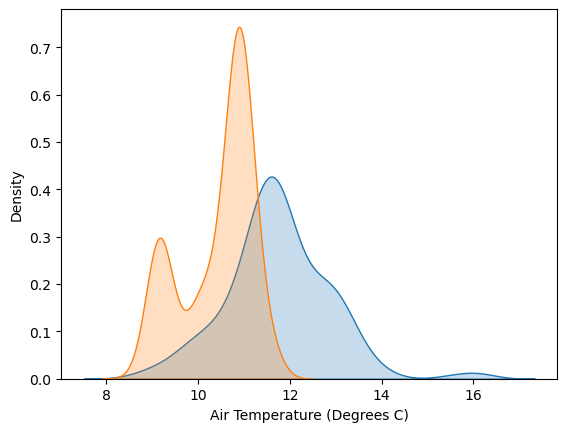

In [63]:
sns.kdeplot((s5),shade=True, label="simulated")
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)

In [64]:
#result=pd.concat([ts1,ts2,ts3,ts4])
#result

In [65]:
from scipy.stats import johnsonsu

# Load your dataset into a NumPy array
data = pd.read_csv('data.csv')

# Fit the Johnson SU distribution to your data
a, b, loc, scale = johnsonsu.fit(data)

# The 'a' and 'b' parameters are now available for use
print('a:', a)
print('b:', b)

a: 1.2011500626388192
b: 1.0081551947944454


In [66]:
import numpy as np
from scipy.stats import johnsonsu

a, b = 1.20, 1.008  # shape parameters
s6 = johnsonsu.rvs(a, b, size=100)
print(s6)

[ -1.47112929  -3.14028793  -1.200613    -0.5893119   -0.61926869
  -7.95822869  -1.23139182  -1.0697798   -3.71135415  -0.75643007
  -0.52154449  -0.47105135  -0.33547711  -0.73540811 -15.510839
  -1.11008062  -0.5538196   -3.4661192  -12.36008917  -5.25029127
  -0.06637434  -1.43457585  -1.31529295  -3.67225641  -1.15158162
 -17.71055624  -2.52923673   0.41936284  -0.11712432  -4.67767761
  -1.29834677  -4.21633394  -1.58441374  -1.29598424  -0.07894944
  -3.42998131  -2.80964153   0.37106274  -2.19248525  -8.41756081
  -2.16138632   0.13871218  -1.67789583   0.16440216  -7.49720928
   2.32385809  -2.43780926  -0.70626922  -3.64842882  -0.34035123
  -3.76283767  -5.81162978  -1.1606508   -0.53514723  -4.55919503
   0.12664363  -0.83811786  -7.4425492   -0.74232718  -1.83768039
  -1.13154693  -6.62135567  -0.71368933  -0.35616263 -13.77363446
  -3.36944882  -0.08400006  -2.14545958  -4.43884836  -1.24301902
   1.70739552  -8.25391361  -0.75667262  -2.55134029  -2.02806977
  -2.4385787

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

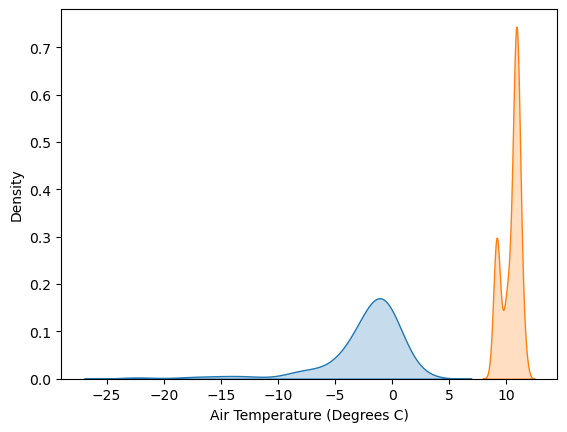

In [67]:
sns.kdeplot((s6),shade=True, label="simulated")
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)

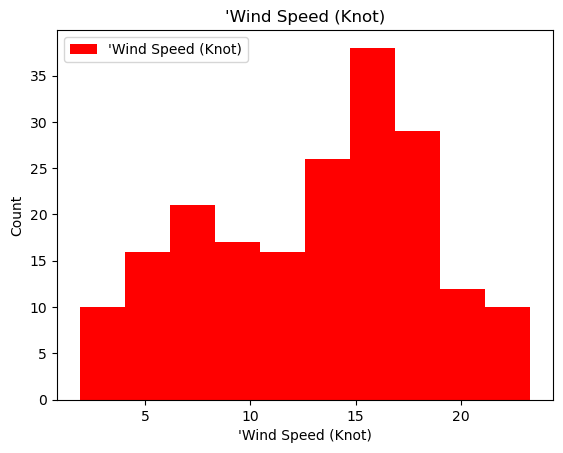

In [68]:
a = df3['Wind Speed (Knot)']
plt.hist(a,  label = "Iris setosa", color = "red",alpha=1) 
plt.title("'Wind Speed (Knot)")
plt.xlabel("'Wind Speed (Knot)")
plt.ylabel("Count")
plt.legend(["'Wind Speed (Knot)"])
plt.show()

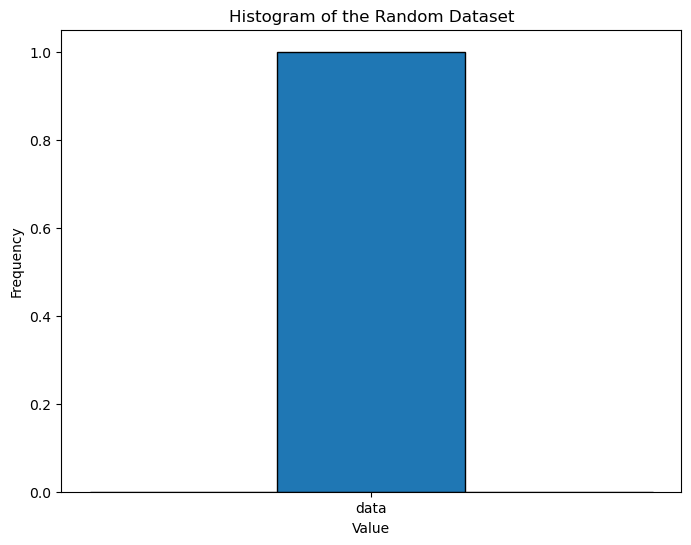

In [69]:
plt.figure(figsize=(8, 6))
plt.hist('data', bins=3, edgecolor='k')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of the Random Dataset')
plt.show()

In [70]:
idx = pd.date_range("2018-01-01", periods=100, freq="Y")
idx

DatetimeIndex(['2018-12-31', '2019-12-31', '2020-12-31', '2021-12-31',
               '2022-12-31', '2023-12-31', '2024-12-31', '2025-12-31',
               '2026-12-31', '2027-12-31', '2028-12-31', '2029-12-31',
               '2030-12-31', '2031-12-31', '2032-12-31', '2033-12-31',
               '2034-12-31', '2035-12-31', '2036-12-31', '2037-12-31',
               '2038-12-31', '2039-12-31', '2040-12-31', '2041-12-31',
               '2042-12-31', '2043-12-31', '2044-12-31', '2045-12-31',
               '2046-12-31', '2047-12-31', '2048-12-31', '2049-12-31',
               '2050-12-31', '2051-12-31', '2052-12-31', '2053-12-31',
               '2054-12-31', '2055-12-31', '2056-12-31', '2057-12-31',
               '2058-12-31', '2059-12-31', '2060-12-31', '2061-12-31',
               '2062-12-31', '2063-12-31', '2064-12-31', '2065-12-31',
               '2066-12-31', '2067-12-31', '2068-12-31', '2069-12-31',
               '2070-12-31', '2071-12-31', '2072-12-31', '2073-12-31',
      

In [71]:
#rng = np.random.default_rng()



generate random numbers between 0 and 1 , averafe of 25 recoded incidnets per day

2.2709067257326163 0 23.730517900649193


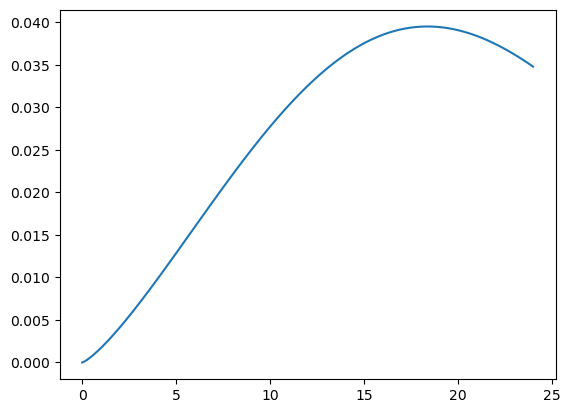

In [72]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt


data = stats.weibull_min.rvs(2, loc=0, scale=24, size=100)

# Fit Weibull distribution
shape, loc, scale = stats.weibull_min.fit(data, floc=0)

# Print parameters
print(shape, loc, scale)

# Plot distribution
x = np.linspace(0, 24, 1000)
plt.plot(x, stats.weibull_min.pdf(x, shape, loc, scale))
plt.show()

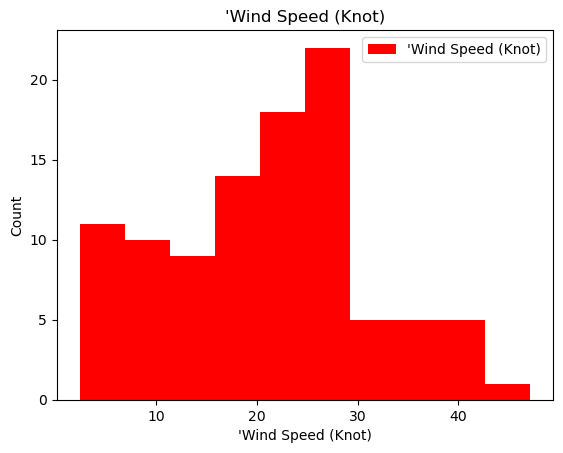

In [73]:
a = data
plt.hist(a,  label = "Iris setosa", color = "red",alpha=1) 
plt.title("'Wind Speed (Knot)")
plt.xlabel("'Wind Speed (Knot)")
plt.ylabel("Count")
plt.legend(["'Wind Speed (Knot)"])
plt.show()

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

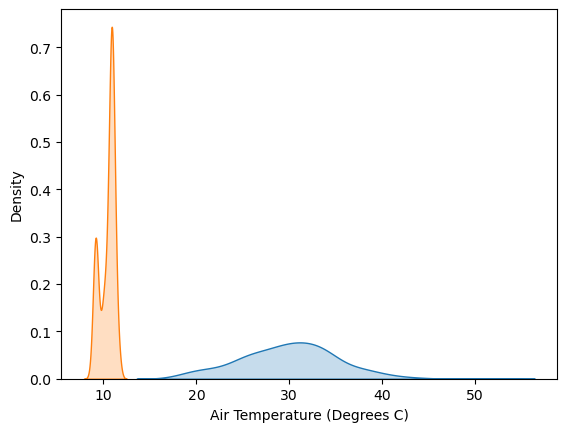

In [74]:
import numpy as np

x = np.random.poisson((30) ,size=200)


sns.kdeplot(x,shade=True)
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)

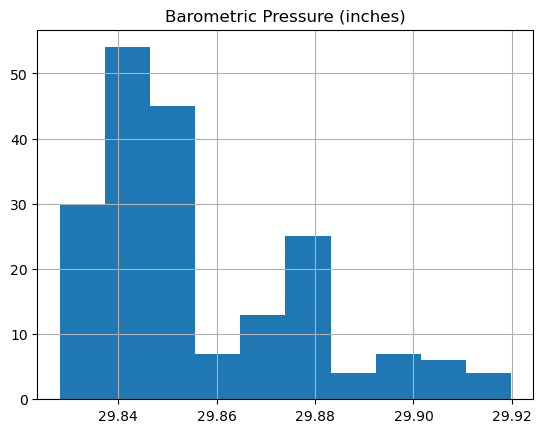

In [75]:
df3.hist('Barometric Pressure (inches)')
plt.show()
#plt.hist(df3('Barometric Pressure (inches)'))
#plt.show()

<AxesSubplot:xlabel='Barometric Pressure (inches)', ylabel='Density'>

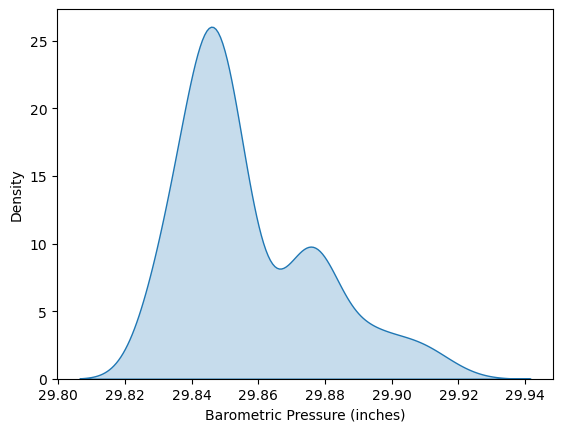

In [76]:
sns.kdeplot(df3['Barometric Pressure (inches)'],shade=True)

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

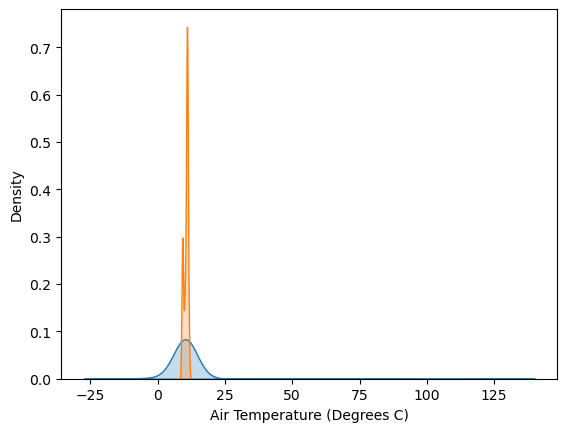

In [77]:
loc = 10.42
scale = .76

# Generate 200 random numbers from a Cauchy distribution
cauchy_data = np.random.standard_cauchy(size=200)

# Adjust the data to have the desired location and scale parameters
cauchy_data = loc + scale * cauchy_data

# Print the generated data
#print()
sns.kdeplot(cauchy_data,shade=True)
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

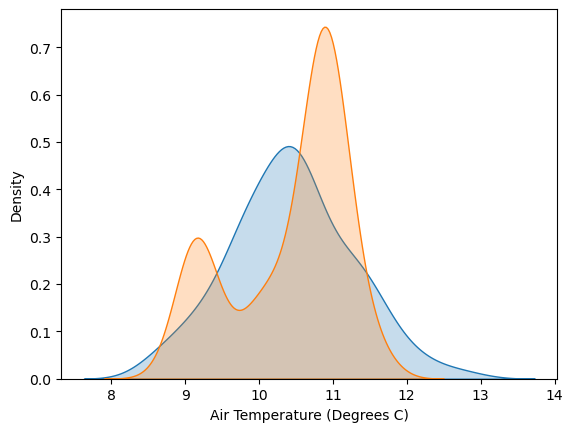

In [78]:
# Set the shape and scale parameters
shape = 1
scale = 1

# Calculate the mean and standard deviation
mean = 10.42
std_dev = 0.766

# Calculate the shape and scale parameters of the double gamma distribution
a = mean ** 2 / std_dev ** 2
b = mean / std_dev ** 2

# Generate 200 random numbers from a double gamma distribution
dgamma_data = np.random.standard_cauchy(size=100)
dgamma_data = np.random.gamma(shape=a, scale=1/b, size=100)

# Print the generated data
sns.kdeplot(dgamma_data,shade=True)
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)
#print(dgamma_data)

In [79]:


# Normal distribution variables
mu1, sigma1 = 29.8566, .0208
#mu2, sigma2 = 0, 1
normal1 = np.random.normal(mu1, sigma1, 180)

# Create dataframe
df23 = pd.DataFrame({'normal1': normal1})

<AxesSubplot:xlabel='Barometric Pressure (inches)', ylabel='Density'>

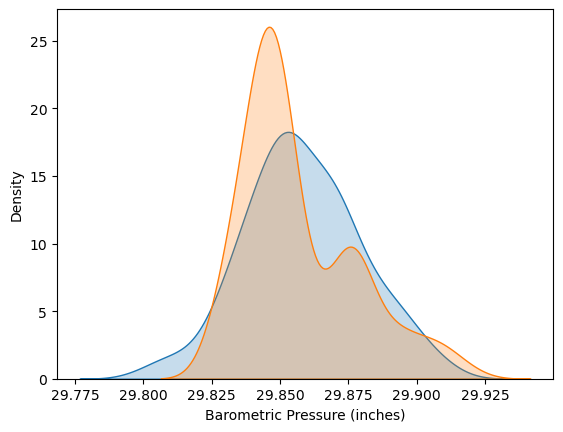

In [80]:
sns.kdeplot(normal1,shade=True)
sns.kdeplot(df3['Barometric Pressure (inches)'],shade=True)

In [81]:
rng1 = np.random.default_rng()
mu1, sigma1 = 267, 16.53
ts4 = pd.DataFrame(data=rng1.normal(mu1, sigma1,len(idx1)),index =idx1, columns=['Synthesised Wind direction'])
ts4

,Synthesised Wind direction
2023-11-08 00:00:33,282.788719
2023-11-08 00:01:33,273.697471
2023-11-08 00:02:33,249.078516
2023-11-08 00:03:33,292.780806
2023-11-08 00:04:33,286.000618
...,...
2023-11-08 01:35:33,274.888702
2023-11-08 01:36:33,239.983549
2023-11-08 01:37:33,279.868069
2023-11-08 01:38:33,254.880510


In [82]:
df3.describe()

,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot)
count,195.000000,195.000000,195.000000,195.000000
mean,10.422564,29.856636,267.735385,13.044615
std,0.766908,0.020849,16.536686,5.296362
min,8.700000,29.828200,195.600000,1.900000
25%,9.950000,29.843000,256.750000,8.500000
50%,10.800000,29.848900,269.200000,14.300000
75%,10.900000,29.872500,280.300000,16.900000
max,11.700000,29.919800,297.900000,23.300000


<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

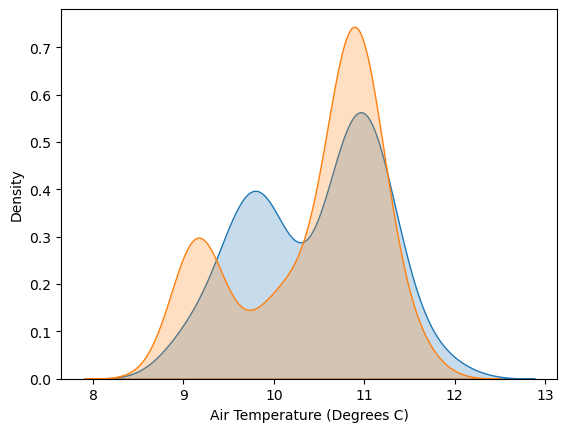

In [83]:
import numpy as np
from scipy.stats import dweibull
mean = 10.4225
std_dev = 0.7669

# Generate 1000 random numbers from the double Weibull distribution
data = dweibull.rvs(2, loc=mean, scale=std_dev, size=100)

sns.kdeplot(data,shade=True)
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)


In [84]:
import numpy as np
from scipy.stats import weibull_min



In [85]:
mean = 30
std_dev = 0.02
min_val = 29.82
max_val = 29.91

# Calculate the shape and scale parameters
c = (max_val - mean) / (mean - min_val)
k = np.log(2) / np.log((c + 1) / c)
#scale = 1 # Set the scale parameter to a positive value

# Generate 1000 random numbers from the Weibull distribution
#data = weibull_min.rvs(k, loc=mean, scale=scale, size=1000)

C:\Users\irivyo\AppData\Local\Temp\ipykernel_12504\4112933684.py:8: RuntimeWarning: invalid value encountered in log
  k = np.log(2) / np.log((c + 1) / c)


Rayleigh PDF 

In [86]:
import numpy as np
from scipy.stats import laplace_asymmetric

mean = 10.42
std_dev = 0.766

# Generate 1000 random numbers from the asymmetric Laplace distribution
data1 = laplace_asymmetric.rvs(1, 10.42,0.76 , size=100)

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

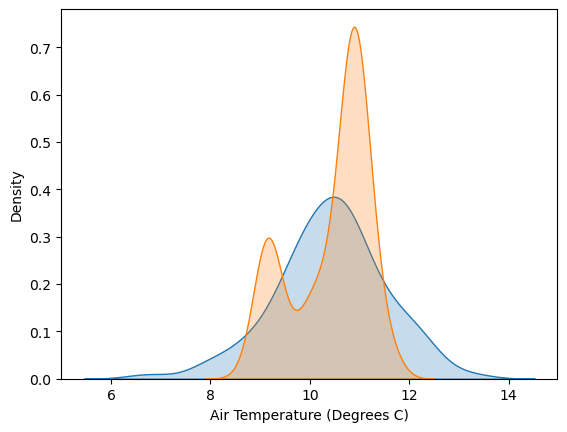

In [87]:
sns.kdeplot(data1,shade=True)
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)

In [88]:
mean = 10.82
std_dev = 0.76
#min_val = 29.82
#max_val = 29.91

# Generate a normal distribution with the given mean and standard deviation
normal_dist = np.random.normal(mean, std_dev, 1000)

# Calculate the probability of getting a value between min_val and max_val


<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

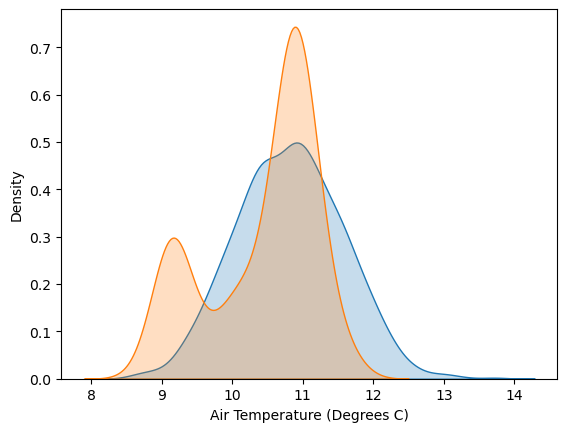

In [89]:
sns.kdeplot(normal_dist,shade=True)
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)

In [90]:
# Load the dataset
data = np.loadtxt('data.csv')

# Calculate the mean and variance of the dataset
mean = np.mean(data)
variance = np.var(data)

# Calculate the shape and scale parameters of the standard gamma distribution
k = (mean / variance) ** 2
theta = variance / mean

# Print the shape and scale parameters
print('Shape parameter (k) =', k)
print('Scale parameter (theta) =', theta)

Shape parameter (k) = 317.2792120103159
Scale parameter (theta) = 0.05614087677067406
